# Team Members
 1. Kanika Saini
 2. Herleen Kaur Sanhotra
 3. Ankit Kejriwal
 4. Jaya Sindhura Sadam 


# Stores Sales Forecast 

**Sales at Walmart go up every holiday season. Some products are sold in large numbers when compared to other products. During Black Friday, for example, shoots up for all the products in electronics department, Clothing department, home decor department,etc.Making strategic decisions about the stock of these products in specific departments is to be made wisely. This project forecasts the sales for departments and various sales. Effects of various markdowns will also be shown where markdowns are the anonymous sales during the holiday season which tend to affect the sales.**

# Data Source 

**The data is downloaded from Kaggle : https://www.kaggle.com/c/walmart-recruiting-store-sales-forecasting/data .**

# Data Features Description

**Introduction to the Dataset:**

**The dataset contains records of 2 years data collected from 45 different Walmart stores for time period 5/2/2010 to 1/11/2012. We are working with 4 datasets train,features,stores and test(for testing our models).**

<font color = 'green'>**Train** dataset contains the following predictors:</font>

**Store** - the store number
<br>**Dept** - the department number
<br>**Date** - the week
<br>**IsHoliday** - whether the week is a special holiday week
<br>**Weekly_Sales** - sales for the given department in the given store
<br><br><font color = 'green'>**Features** dataset contains the following predictors:</font>
<br><br>**Store** - the store number
<br>**Date** - the week
<br>**Temperature** - average temperature in the region
<br>**Fuel_Price** - cost of fuel in the region
<br>**MarkDown1-5** - anonymized data related to promotional markdowns that Walmart is running. MarkDown data is only available after Nov 2011, and is not available for all stores all the time. Missing values are marked as NA.
<br>**CPI** - the consumer price index
<br>**Unemployment** - the unemployment rate
<br>**IsHoliday** - whether the week is a special holiday week
<br><br><font color = 'green'>**Stores** dataset contains the following predictors:</font>
<br><br>**Store** - the store number
<br>**Size**-size of store
<br>**Type**-type of store
<br><br><font color = 'green'>**Test** dataset contains the following predictors:</font>
<br><br>**Store** - the store number
<br>**Dept** - the department number
<br>**Date** - the week
<br>**IsHoliday** - whether the week is a special holiday week
**Goal/Target** variable:

Our aim is to predict the **Weekly Sales**. Therefore, Weekly_Sales is our target variable on which we will test the effects of other predictors.**

# CRISP-DM Process

# Importing the Dataset 

**Loading all the necessary packages**

In [134]:
import pandas as pd
import os
from sklearn.preprocessing import StandardScaler 
from matplotlib import pyplot as plt
import seaborn as sns
from statistics import mean
import numpy as np

**Setting up the directory**

In [135]:
# os.chdir("C:\\Users\\Kanika Saini\\Downloads\\Wallmart-sales forecast\\Wallmart-sales forecast")

**Importing all the datasets required**

In [136]:
features = pd.read_csv('../DataSets/features.csv')
stores = pd.read_csv('../DataSets/stores.csv')
dt1 = pd.read_csv('../DataSets/train.csv')
dt2 = pd.read_csv('../DataSets/test.csv')
# features = pd.read_csv('features.csv')
# stores = pd.read_csv('stores.csv')
# dt1 = pd.read_csv('train.csv')
# dt2 = pd.read_csv('test.csv')

# Data Description

**Getting some information about the dataset using info method. It tells us about the shape of the dataset , data types of the features, etc**

In [137]:
features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8190 entries, 0 to 8189
Data columns (total 12 columns):
Store           8190 non-null int64
Date            8190 non-null object
Temperature     8190 non-null float64
Fuel_Price      8190 non-null float64
MarkDown1       4032 non-null float64
MarkDown2       2921 non-null float64
MarkDown3       3613 non-null float64
MarkDown4       3464 non-null float64
MarkDown5       4050 non-null float64
CPI             7605 non-null float64
Unemployment    7605 non-null float64
IsHoliday       8190 non-null bool
dtypes: bool(1), float64(9), int64(1), object(1)
memory usage: 711.9+ KB


In [138]:
stores.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45 entries, 0 to 44
Data columns (total 3 columns):
Store    45 non-null int64
Type     45 non-null object
Size     45 non-null int64
dtypes: int64(2), object(1)
memory usage: 1.1+ KB


In [139]:
dt1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421570 entries, 0 to 421569
Data columns (total 5 columns):
Store           421570 non-null int64
Dept            421570 non-null int64
Date            421570 non-null object
Weekly_Sales    421570 non-null float64
IsHoliday       421570 non-null bool
dtypes: bool(1), float64(1), int64(2), object(1)
memory usage: 13.3+ MB


In [140]:
dt2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 115064 entries, 0 to 115063
Data columns (total 4 columns):
Store        115064 non-null int64
Dept         115064 non-null int64
Date         115064 non-null object
IsHoliday    115064 non-null bool
dtypes: bool(1), int64(2), object(1)
memory usage: 2.7+ MB


# Data Cleaning and Pre-processing 

**First we need to convert the "Date" attribute from object datatype to datetime datatype.**

In [141]:
features['Date'] = pd.to_datetime(features['Date'])
dt1['Date'] = pd.to_datetime(dt1['Date'])
dt2['Date'] = pd.to_datetime(dt2['Date'])

In [142]:
#after converting the datatype
features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8190 entries, 0 to 8189
Data columns (total 12 columns):
Store           8190 non-null int64
Date            8190 non-null datetime64[ns]
Temperature     8190 non-null float64
Fuel_Price      8190 non-null float64
MarkDown1       4032 non-null float64
MarkDown2       2921 non-null float64
MarkDown3       3613 non-null float64
MarkDown4       3464 non-null float64
MarkDown5       4050 non-null float64
CPI             7605 non-null float64
Unemployment    7605 non-null float64
IsHoliday       8190 non-null bool
dtypes: bool(1), datetime64[ns](1), float64(9), int64(1)
memory usage: 711.9 KB


**After checking for null values in all the datasets we can observe that there are some missing values in the "features" dataset**

In [143]:
features.isnull().sum()

Store              0
Date               0
Temperature        0
Fuel_Price         0
MarkDown1       4158
MarkDown2       5269
MarkDown3       4577
MarkDown4       4726
MarkDown5       4140
CPI              585
Unemployment     585
IsHoliday          0
dtype: int64

In [144]:
stores.isnull().sum()

Store    0
Type     0
Size     0
dtype: int64

In [145]:
dt1.isnull().sum()

Store           0
Dept            0
Date            0
Weekly_Sales    0
IsHoliday       0
dtype: int64

**We are going to replace the missing values in CPI and Unemployment features with mean.**
**For the 5 Markdowns, we will be replacing the missing values with value 0 as no extra sales happened during that time.**

In [146]:


features['CPI'] = features['CPI'].fillna(np.nanmean(features['CPI']))
features['Unemployment'] = features['Unemployment'].fillna(np.nanmean(features['Unemployment']))
features['MarkDown1'] = features['MarkDown1'].fillna(0)
features['MarkDown2'] = features['MarkDown2'].fillna(0)
features['MarkDown3'] = features['MarkDown3'].fillna(0)
features['MarkDown4'] = features['MarkDown4'].fillna(0)
features['MarkDown5'] = features['MarkDown5'].fillna(0)

In [147]:
features.isnull().sum()

Store           0
Date            0
Temperature     0
Fuel_Price      0
MarkDown1       0
MarkDown2       0
MarkDown3       0
MarkDown4       0
MarkDown5       0
CPI             0
Unemployment    0
IsHoliday       0
dtype: int64

**Now we are going to merge dt1, stores, features datasets**

**Merging dt1 and stores dataset based on Store attribute**

In [148]:
dataset  = pd.merge(dt1, stores, on='Store', how='left')

**Checking the first few rows and shape of the merged dataset**

In [149]:
dataset.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday,Type,Size
0,1,1,2010-02-05,24924.50,False,A,151315
1,1,1,2010-02-12,46039.49,True,A,151315
2,1,1,2010-02-19,41595.55,False,A,151315
3,1,1,2010-02-26,19403.54,False,A,151315
4,1,1,2010-03-05,21827.90,False,A,151315


In [150]:
dataset.shape

(421570, 7)

**Merging the new dataset with features dataset on Store, Date and IsHoliday attributes**

In [151]:
dataset = pd.merge(dataset,features, on=['Store','Date','IsHoliday'], how='left')

**Checking for NULL values again in our final dataset. We observe that there are no NULL values**

In [152]:
dataset.isnull().sum()

Store           0
Dept            0
Date            0
Weekly_Sales    0
IsHoliday       0
Type            0
Size            0
Temperature     0
Fuel_Price      0
MarkDown1       0
MarkDown2       0
MarkDown3       0
MarkDown4       0
MarkDown5       0
CPI             0
Unemployment    0
dtype: int64

**Describing only the numeric columns**

In [153]:
dataset.describe()

,Store,Dept,Weekly_Sales,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment
count,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000
mean,22.200546,44.260317,15981.258123,136727.915739,60.090059,3.361027,2590.074819,879.974298,468.087665,1083.132268,1662.772385,171.201947,7.960289
std,12.785297,30.492054,22711.183519,60980.583328,18.447931,0.458515,6052.385934,5084.538801,5528.873453,3894.529945,4207.629321,39.159276,1.863296
min,1.000000,1.000000,-4988.940000,34875.000000,-2.060000,2.472000,0.000000,-265.760000,-29.100000,0.000000,0.000000,126.064000,3.879000
25%,11.000000,18.000000,2079.650000,93638.000000,46.680000,2.933000,0.000000,0.000000,0.000000,0.000000,0.000000,132.022667,6.891000
50%,22.000000,37.000000,7612.030000,140167.000000,62.090000,3.452000,0.000000,0.000000,0.000000,0.000000,0.000000,182.318780,7.866000
75%,33.000000,74.000000,20205.852500,202505.000000,74.280000,3.738000,2809.050000,2.200000,4.540000,425.290000,2168.040000,212.416993,8.572000
max,45.000000,99.000000,693099.360000,219622.000000,100.140000,4.468000,88646.760000,104519.540000,141630.610000,67474.850000,108519.280000,227.232807,14.313000


**Describing all the attributes including the bool and Date attribute ,etc**

In [154]:
dataset.describe(include='all')

,Store,Dept,Date,Weekly_Sales,IsHoliday,Type,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment
count,421570.000000,421570.000000,421570,421570.000000,421570,421570,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000
unique,NaN,NaN,143,NaN,2,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,2011-12-23 00:00:00,NaN,False,A,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,3027,NaN,391909,215478,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
first,NaN,NaN,2010-02-05 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,NaN,NaN,2012-10-26 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,22.200546,44.260317,NaN,15981.258123,NaN,NaN,136727.915739,60.090059,3.361027,2590.074819,879.974298,468.087665,1083.132268,1662.772385,171.201947,7.960289
std,12.785297,30.492054,NaN,22711.183519,NaN,NaN,60980.583328,18.447931,0.458515,6052.385934,5084.538801,5528.873453,3894.529945,4207.629321,39.159276,1.863296
min,1.000000,1.000000,NaN,-4988.940000,NaN,NaN,34875.000000,-2.060000,2.472000,0.000000,-265.760000,-29.100000,0.000000,0.000000,126.064000,3.879000
25%,11.000000,18.000000,NaN,2079.650000,NaN,NaN,93638.000000,46.680000,2.933000,0.000000,0.000000,0.000000,0.000000,0.000000,132.022667,6.891000


In [155]:
pd.crosstab(dataset['IsHoliday'],dataset['Type'],margins=True)

Type,A,B,C,All
IsHoliday,,,,
False,200293,151983,39633,391909
True,15185,11512,2964,29661
All,215478,163495,42597,421570


# Data Visualization

**The records of each store is about 10,000 approximately.**

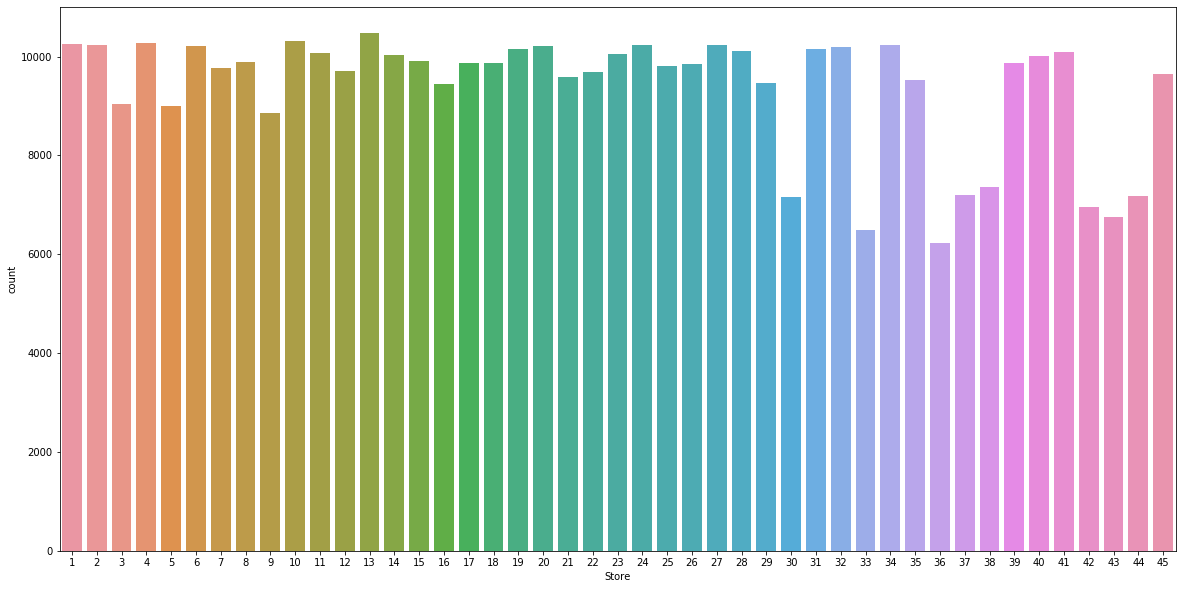

In [156]:
plt.figure(figsize=(20,10))
sns.countplot(dataset['Store'])

**The following plot shows the count of all the types of stores . It can be seen that there are more than 200000 stores of Type A whereas about 50000 stores of Type C.**

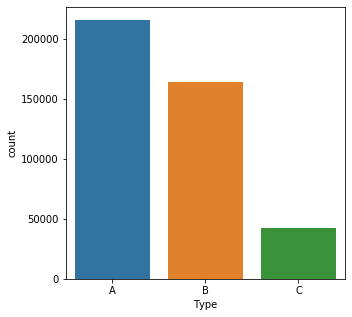

In [157]:
plt.figure(figsize=(5,5))
sns.countplot(dataset['Type'])

**From the below plot, it can be concluded that the number of non-working of walmart store is very less when compared to the working days in the span of two years. These holidays might be during public holidays where the superstores might be  open and others might not** 

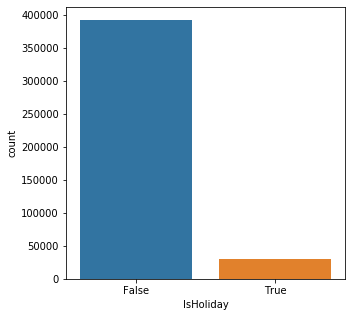

In [158]:
plt.figure(figsize=(5,5))
sns.countplot(dataset['IsHoliday'])

**Following plot shows the distribution of the Weekly Sales. It can be seen that the data is highly right skewed. Most of the weekly sales are below 100000.**

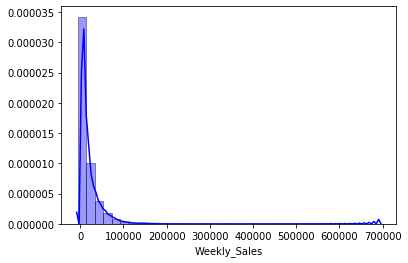

In [159]:
sns.distplot(dataset['Weekly_Sales'],hist='True', bins=int(180/5), color = 'blue',hist_kws={'edgecolor':'black'})

**The following histograms show the distributions of each feature. The outliers in the Markdown 1, Markdown 2 , Markdown 3, Markdown 4, Markdown 5 are the missing values that were imputed. The data in Temperature seems to be left skewed. Unemployment data, to some extent is normally distributed. The rest of the variables do not seem to have any distinct distribution.**

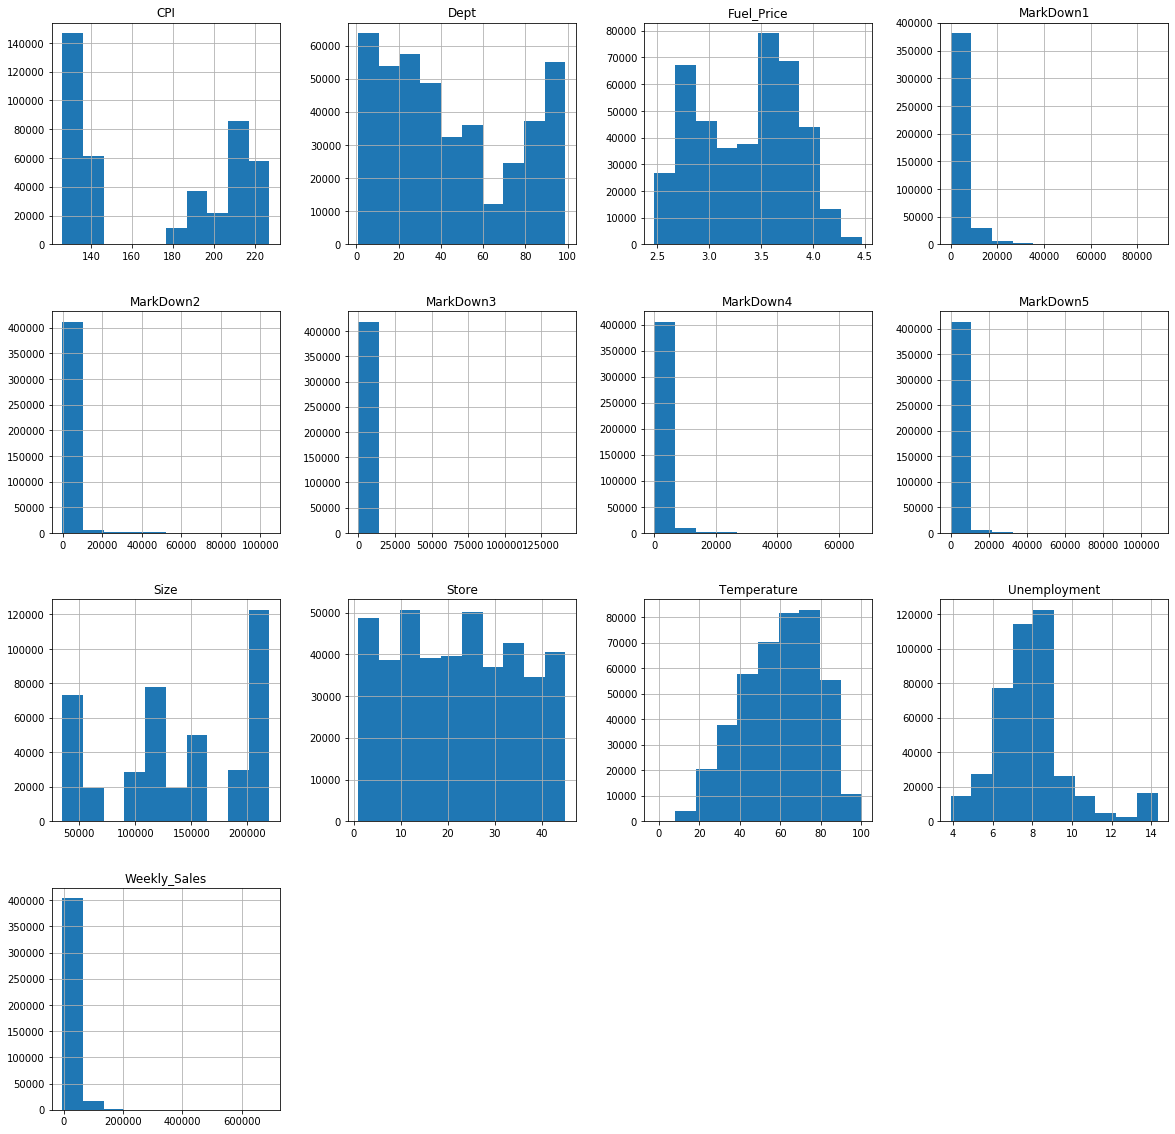

In [160]:
num=dataset.select_dtypes(include=['int64','float64'])
num.hist(figsize=(20,20))
plt.show()

**The following correlation table shows the correlation among all the features. An interesting correlation can be seen between Markdown 1, Markdown 2 , Markdown 3, Markdown 4,Markdown 5 and Fuel_Price. Also, each Markdown feature is well correlated to each other. The size of the store is also slighly related to the weekly sales which is evident because, a large Walmart store will have higher sales when compared to a smaller Walmart store. Many negative correlations can also be seen. Unemployment rate is nowhere related to any of the MarkDowns. Customer Price index (CPI) and size have a slight correlation with the MarkDowns.** 

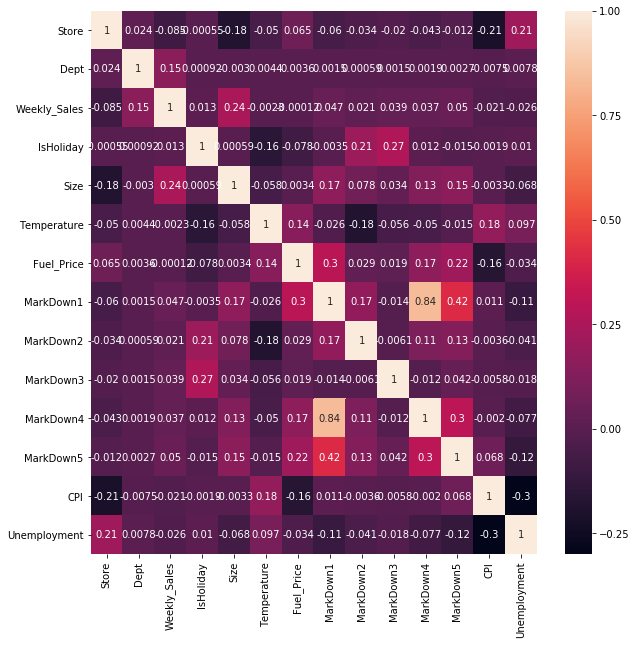

In [161]:
corr=dataset.corr()
plt.figure(figsize=(10,10))
sns.heatmap(corr,annot=True)

**The following cell shows the boxplot for Weekly Sales and IsHoliday feature. Firstly, we can see that there are many outliers for the boxes. These outliers might be because of the sales during the holidays where it shoots up. It can also be noticed that the data distribution for both the boxplots is almost the same except for the third quartile of IsHoliday= True.**

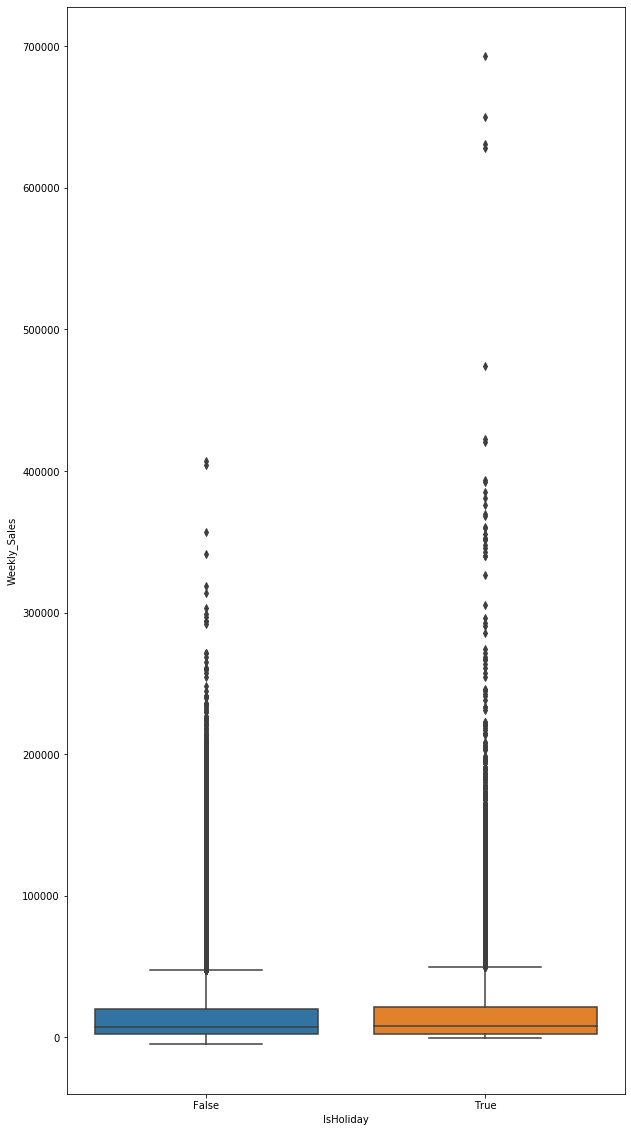

In [162]:
plt.figure(figsize=(10,20))
sns.boxplot(dataset['IsHoliday'],dataset['Weekly_Sales'])

**Here we are preparing our data for modeling.**

**The below cell has the variance of features. It can be seen that they have different ranges. So, Standardization is required to balance the variance. This will reduce the bias because without standardization, the results might be inclined towards the most predominant feature.**

In [163]:
dataset.var()

Store           1.634638e+02
Dept            9.297654e+02
Weekly_Sales    5.157979e+08
IsHoliday       6.540827e-02
Size            3.718632e+09
Temperature     3.403262e+02
Fuel_Price      2.102356e-01
MarkDown1       3.663138e+07
MarkDown2       2.585253e+07
MarkDown3       3.056844e+07
MarkDown4       1.516736e+07
MarkDown5       1.770414e+07
CPI             1.533449e+03
Unemployment    3.471872e+00
dtype: float64

In [164]:
dataset.dtypes

Store                    int64
Dept                     int64
Date            datetime64[ns]
Weekly_Sales           float64
IsHoliday                 bool
Type                    object
Size                     int64
Temperature            float64
Fuel_Price             float64
MarkDown1              float64
MarkDown2              float64
MarkDown3              float64
MarkDown4              float64
MarkDown5              float64
CPI                    float64
Unemployment           float64
dtype: object

**The following cell perform the Standardization on the dataset as the features have different ranges. After standardization, the data will be in the range of -1 to 1. Standardization is performed on the numerical dataset except for the Date attribute.**

In [165]:
scaler=StandardScaler()
dt=scaler.fit_transform(dataset[["Weekly_Sales","Temperature","CPI","Unemployment","Fuel_Price","Size","MarkDown1","MarkDown2","MarkDown3","MarkDown4","MarkDown5"]])
dt=pd.DataFrame(dt,columns=["Weekly_Sales","Temperature","CPI","Unemployment","Fuel_Price","MarkDown1","Size","MarkDown2","MarkDown3","MarkDown4","MarkDown5"])
dataset=dataset.drop(["Weekly_Sales","Temperature","CPI","Unemployment","Fuel_Price","MarkDown1","MarkDown2","Size","MarkDown3","MarkDown4","MarkDown5"],axis=1)
frames=[dataset,dt]
dt=pd.concat(frames,axis=1) 

In [166]:
dt.dtypes

Store                    int64
Dept                     int64
Date            datetime64[ns]
IsHoliday                 bool
Type                    object
Weekly_Sales           float64
Temperature            float64
CPI                    float64
Unemployment           float64
Fuel_Price             float64
MarkDown1              float64
Size                   float64
MarkDown2              float64
MarkDown3              float64
MarkDown4              float64
MarkDown5              float64
dtype: object

**The following cell changes the dtype of the columns 'IsHoliday' & 'Type' to category in order to OneHotEncode them.** 

In [167]:
dt['Date']=dt['Date'].astype('str')
dt['IsHoliday']=dt['IsHoliday'].astype('category')
dt['Type']=dt['Type'].astype('category')
dt['Size']=dt['Size'].astype('str')

In [168]:
dt.dtypes

Store              int64
Dept               int64
Date              object
IsHoliday       category
Type            category
Weekly_Sales     float64
Temperature      float64
CPI              float64
Unemployment     float64
Fuel_Price       float64
MarkDown1        float64
Size              object
MarkDown2        float64
MarkDown3        float64
MarkDown4        float64
MarkDown5        float64
dtype: object

**The below cell creates new columns 'year' and 'week' information from the date column**

In [169]:
# Add column for year
dt["Year"] = pd.to_datetime(dt["Date"], format="%Y-%m-%d").dt.year
# Add column for day
dt["Week"] = pd.to_datetime(dt["Date"], format="%Y-%m-%d").dt.week

**The following cell is performing one-hot encoding for the provided columns**

In [170]:
 dt_type = pd.get_dummies(dt,columns=['IsHoliday','Type','Week','Year'])

In [171]:
dt=dt_type

In [172]:
dt.head()

,Store,Dept,Date,Weekly_Sales,Temperature,CPI,Unemployment,Fuel_Price,MarkDown1,Size,...,Week_46,Week_47,Week_48,Week_49,Week_50,Week_51,Week_52,Year_2010,Year_2011,Year_2012
0,1,1,2010-02-05,0.393782,-0.963798,1.018774,0.078201,-1.720834,0.239209,-0.4279432804605908,...,0,0,0,0,0,0,0,1,0,0
1,1,1,2010-02-12,1.323501,-1.169783,1.022498,0.078201,-1.773177,0.239209,-0.4279432804605908,...,0,0,0,0,0,0,0,1,0,0
2,1,1,2010-02-19,1.127829,-1.092810,1.023697,0.078201,-1.847330,0.239209,-0.4279432804605908,...,0,0,0,0,0,0,0,1,0,0
3,1,1,2010-02-26,0.150687,-0.729625,1.024476,0.078201,-1.744825,0.239209,-0.4279432804605908,...,0,0,0,0,0,0,0,1,0,0
4,1,1,2010-03-05,0.257435,-0.736672,1.025255,0.078201,-1.605243,0.239209,-0.4279432804605908,...,0,0,0,0,0,0,0,1,0,0


# Modeling Phase

In [173]:

X = dt.drop(columns=['Weekly_Sales','Date'],axis=1)
Y = dt['Weekly_Sales']

**The below cell split final dataset into train and test dataset in 70%:30% ratio**

In [174]:
from sklearn.model_selection import train_test_split

# splits the training and test data set in 70% : 30%
# assign random_state to any value. This ensures consistency.
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3) 
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(295099, 72)
(126471, 72)
(295099,)
(126471,)


## ***Linear Regression:***

**The following cell will execute linear regression model. The model is trained using X_train & Y_train dataset.Linear regression is expected to perform poorly as the dataset is huge.**

In [175]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
from sklearn.metrics import accuracy_score

lin_model = LinearRegression()
lin_model.fit(X_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

**The below cell is predicting the score of linear regression model using X_test. In other words, prediction is done using the testing set.**

In [176]:
# model evaluation for training set

y_test_predict = lin_model.predict(X_test)
rmse = (np.sqrt(mean_squared_error(Y_test, y_test_predict)))
r2 = r2_score(Y_test, y_test_predict)

print("The model performance for training set:",r2)
print('RMSE is {}'.format(rmse))

The model performance for training set: 0.09521997096866852
RMSE is 0.9482128242494691


## ***Lasso Regression***

**The following cell will execute lasso regression model. The model is trained using X_train & Y_train dataset. Lasso Regression is chosen because it adds a penalty term to the linear rergression. It reduces the values of the unimportant features to almost zero. **

In [177]:
from sklearn.linear_model import Lasso

In [178]:
lasso = Lasso()
lasso.fit(X_train, Y_train)

Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

**The below cell is predicting the score of Lasso regression model using X_test.**

In [179]:
# model evaluation for training set

y_test_predict = lasso.predict(X_test)
rmse = (np.sqrt(mean_squared_error(Y_test, y_test_predict)))
r2 = r2_score(Y_test, y_test_predict)

print("The model performance for training set:")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))
print("\n")


The model performance for training set:
RMSE is 0.9855090325149104
R2 score is 0.022644469731438077




**The following cell perform hyper parameter tuning in order to determine the optimal values for a given model. GridSearchCV is used here. It will try out all the combinations of the values in the grid. Best set of paramters can be found out using this technique.*

In [180]:
from sklearn.model_selection import GridSearchCV
param_grid={'alpha':[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0]}
grid=GridSearchCV(lasso,param_grid,cv=5)
grid.fit(X_train,Y_train)
print(grid.best_params_)

{'alpha': 0.1}


**In the below cell we are traning the dataset again using the value from GridSearhCV**

In [181]:
lasso = Lasso(alpha=0.1)
lasso.fit(X_train, Y_train)
# model evaluation for training set

y_test_predict = lasso.predict(X_test)
rmse = (np.sqrt(mean_squared_error(Y_test, y_test_predict)))
r2 = r2_score(Y_test, y_test_predict)

print("The model performance for training set:")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))
print("\n")


The model performance for training set:
RMSE is 0.9596850701399156
R2 score is 0.07319400661019171




## ***Ridge Regression***

**The following cell will execute ridge regression model. Ridge regression will reduce the unimportant features to absolute zero. Lasso and Ridge regression can be used for feature selection as they eliminate the non-contributing features.**

In [182]:
from sklearn.linear_model import Ridge

In [183]:
ridge = Ridge() 
ridge.fit(X_train, Y_train)

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [184]:
# model evaluation for training set

y_test_predict = ridge.predict(X_test)
rmse = (np.sqrt(mean_squared_error(Y_test, y_test_predict)))
r2 = r2_score(Y_test, y_test_predict)

print("The model performance for training set:")
print("")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))
print("\n")

The model performance for training set:

RMSE is 0.9482128120051087
R2 score is 0.09521999433568584




**The following cell perform hyper parameter tuning in order to determine the optimal values for a given model.**

In [185]:
from sklearn.model_selection import GridSearchCV
param_grid={'alpha':[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0]}
grid=GridSearchCV(ridge,param_grid,cv=5)
grid.fit(X_train,Y_train)
print(grid.best_params_)

{'alpha': 1.0}


**In the below cell we are traning the dataset again using the value from GridSearhCV**

In [186]:
ridge = Ridge(alpha=1.0) 
ridge.fit(X_train, Y_train)
# model evaluation for training set

y_test_predict = ridge.predict(X_test)
rmse = (np.sqrt(mean_squared_error(Y_test, y_test_predict)))
r2 = r2_score(Y_test, y_test_predict)

print("The model performance for training set:")
print("")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))
print("\n")

The model performance for training set:

RMSE is 0.9482128120051087
R2 score is 0.09521999433568584




## ***Elastic Regression***

**The following cell will execute Elastic regression model. Elastic net regression is like a combination of lasso and ridge regression where we can tune in the alpha and the l1_ratio parameter to make the model behave like Lasso and Ridge regression.**

In [187]:
from sklearn.linear_model import ElasticNet

In [188]:
enet = ElasticNet() 
enet.fit(X_train, Y_train)

ElasticNet(alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0.5,
           max_iter=1000, normalize=False, positive=False, precompute=False,
           random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

In [189]:
# model evaluation for training set

y_test_predict = enet.predict(X_test)
rmse = (np.sqrt(mean_squared_error(Y_test, y_test_predict)))
r2 = r2_score(Y_test, y_test_predict)

print("The model performance for training set:")
print("")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))
print("\n")

The model performance for training set:

RMSE is 0.9827413379073175
R2 score is 0.02812635404223729




**The following cell perform hyper parameter tuning in order to determine the optimal values for a given model**

In [190]:
from sklearn.model_selection import GridSearchCV
param_grid={'alpha':[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0],
           'l1_ratio':[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0]}
grid=GridSearchCV(enet,param_grid,cv=5)
grid.fit(X_train,Y_train) 
print(grid.best_params_)

{'alpha': 0.1, 'l1_ratio': 0.1}


**In the below cell we are traning the dataset again using the value from GridSearhCV**

In [191]:
enet = ElasticNet(alpha=0.1,l1_ratio=0.1) 
enet.fit(X_train, Y_train)
# model evaluation for training set

y_test_predict = enet.predict(X_test)
rmse = (np.sqrt(mean_squared_error(Y_test, y_test_predict)))
r2 = r2_score(Y_test, y_test_predict)

print("The model performance for training set:")
print("")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))
print("\n")

The model performance for training set:

RMSE is 0.9535788067342484
R2 score is 0.0849506071718431




## ***DecisionTree Regression***

**The following cell will execute DecisionTree model. Decision tree is a tree based regression model that builds a tree using greedy serach. **

In [192]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error
dR = DecisionTreeRegressor()
dR.fit(X_train,Y_train)
y_test_pred = dR.predict(X_test)
print("MSE :")
print(mean_absolute_error(Y_test,y_test_pred))
print("RMSE:")
print(np.sqrt(mean_squared_error(Y_test, y_test_pred)))


MSE :
0.08701963624526776
RMSE:
0.22153780228673928


In [193]:
from sklearn.model_selection import cross_val_score
sc=cross_val_score(dR,X_train,Y_train,cv=5)
print("5 fold cross vaidation score:",sc)
print("Mean score",np.mean(sc))

5 fold cross vaidation score: [0.94607738 0.95242702 0.94178657 0.93373883 0.95031863]
Mean score 0.944869687819789


## ***Random Forest Regression***

**The following cell will execute Random Forest model**

In [194]:
# code for Question 4
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error as MSE
#Build the rantdom forest classifier
rf=RandomForestRegressor(random_state=1)
#fit the training set data 
rf.fit(X_train,Y_train)
#make the prediction on the train set 
y_pred_test=rf.predict(X_test)
# Evaluate the test set RMSE
rmse_test = MSE(Y_test, y_pred_test)**(1/2)
# Print the test set RMSE
print('Train set RMSE of rf: {:.2f}'.format(rmse_test)) 


//anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Train set RMSE of rf: 0.18


In [ ]:
from sklearn.model_selection import cross_val_score
sc=cross_val_score(rf,X_train,Y_train,cv=5)

In [ ]:
print("5 fold cross vaidation score:",sc)
print("Mean score",np.mean(sc))